# Basit Lineer Regresyon ile Ev Boyut-Fiyat Tahimini


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from function import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

veriler = pd.read_csv('house_prices_large.csv')
veriler = np.array(veriler)
print(f'Veriler: \n{veriler},\n'
      f'Verilerin Boyutu: {veriler.shape}')

Veriler: 
[[    296 4751096]
 [     64  989760]
 [    485 7282760]
 ...
 [     61  871629]
 [    480 5190720]
 [    486 9461448]],
Verilerin Boyutu: (1000000, 2)


In [17]:
x=veriler[:,1]
x = (x - np.min(x)) / (np.max(x) - np.min(x))
y=veriler[:,0]
y = (y - np.min(y)) / (np.max(y) - np.min(y))
print(f'X Değerleri: {x}, X Değerlerinin Boyutu: {x.shape}')
print(f'Y Değerleri: {y}, Y Değerlerinin Boyutu: {y.shape}')

X Değerleri: [0.29327846 0.03376053 0.46795368 ... 0.02560994 0.32361085 0.61827489], X Değerlerinin Boyutu: (1000000,)
Y Değerleri: [0.54666667 0.03111111 0.96666667 ... 0.02444444 0.95555556 0.96888889], Y Değerlerinin Boyutu: (1000000,)


In [18]:
X_train, X_test= train_test_split(x, test_size=0.6, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.6 , random_state=42)
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}, y_test shape: {y_test.shape}')


X_train shape: (400000,), X_test shape: (600000,)
y_train shape: (400000,), y_test shape: (600000,)


In [31]:
w= np.random.rand()
b= np.random.rand()
alpha = 0.5
iteration= 10000

w_final, b_final, hist_j = run(X_train, y_train, w, b, linearFunction, costFunction, gradientFunction, alpha, iteration)

Iteration: 0, Cost: 0.03864172462458825
Iteration: 1000, Cost: 0.013062464304819225
Iteration: 2000, Cost: 0.013062464304819226
Iteration: 3000, Cost: 0.013062464304819226
Iteration: 4000, Cost: 0.013062464304819226
Iteration: 5000, Cost: 0.013062464304819226
Iteration: 6000, Cost: 0.013062464304819226
Iteration: 7000, Cost: 0.013062464304819226
Iteration: 8000, Cost: 0.013062464304819226
Iteration: 9000, Cost: 0.013062464304819226
Weight: 1.105932978546404, Bias: 0.11850435910000374
Prediction: 0.27834799767448243, Target: 0.2577777777777778
Prediction: 0.7211362892861157, Target: 0.8422222222222222
Prediction: 0.5750823706916935, Target: 0.3933333333333333
Prediction: 0.3971360906090716, Target: 0.4622222222222222
Prediction: 0.8322715828524081, Target: 0.8955555555555555


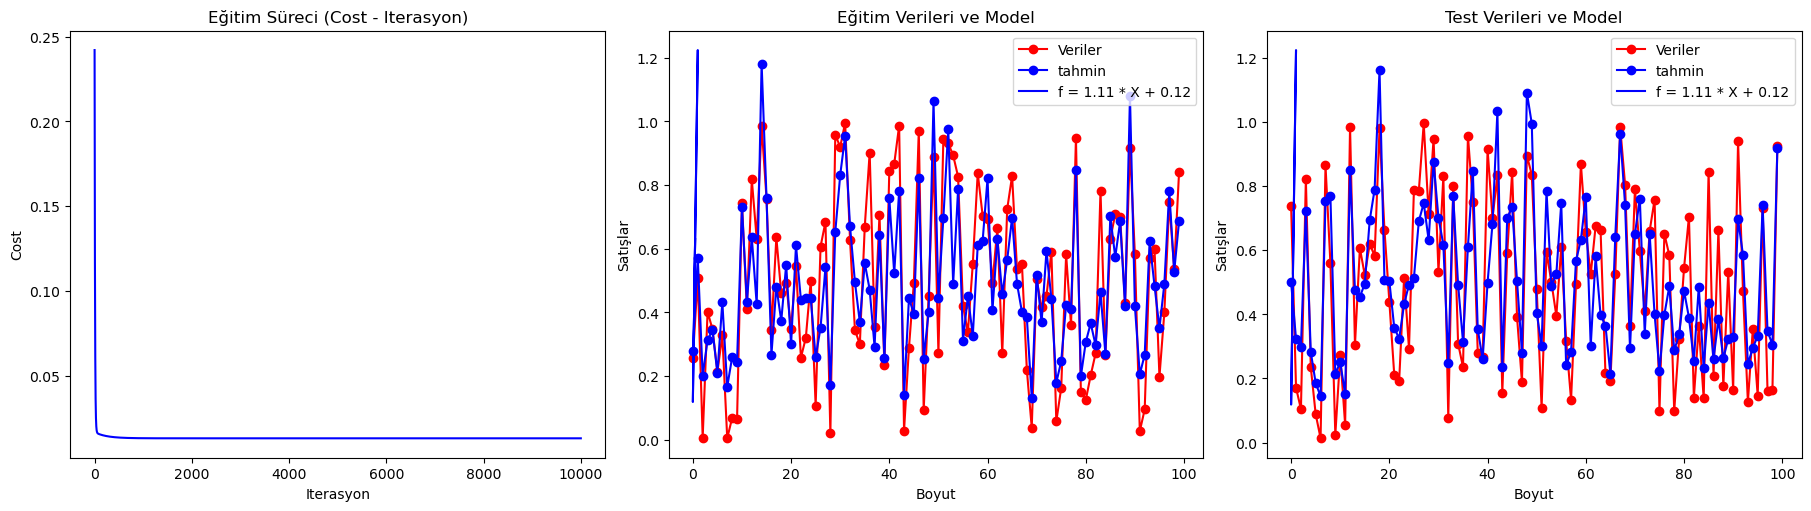

In [30]:

X_train = X_train.flatten()
y_train = y_train.flatten()
X_test = X_test.flatten()
y_test = y_test.flatten()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, constrained_layout=True, figsize=(18, 5))

ax1.plot(range(len(hist_j)), hist_j, color="blue", linestyle='-')
ax1.set_xlabel('Iterasyon')
ax1.set_ylabel('Cost')
ax1.set_title("Eğitim Süreci (Cost - Iterasyon)")

y_pred_train = linearFunction(X_train,w_final,b_final)

ax2.plot( y_train[:100], color="red", marker='o', label='Veriler')
ax2.plot( y_pred_train[:100], color="blue", marker='o', label='tahmin')
ax2.plot(X_train, linearFunction(X_train, w_final, b_final), color="blue", linestyle='-', label=f"f = {w_final:.2f} X + {b_final:.2f}")
ax2.legend()
ax2.set_xlabel('Boyut')
ax2.set_ylabel('Satışlar')
ax2.set_title("Eğitim Verileri ve Model")

y_pred_test  = linearFunction(X_test, w_final, b_final)

ax3.plot( y_test[:100], color="red", marker='o', label='Veriler')
ax3.plot( y_pred_test[:100], color="blue", marker='o', label='tahmin')
ax3.plot(X_test, linearFunction(X_test, w_final, b_final), color="blue", linestyle='-', label=f"f = {w_final:.2f}X + {b_final:.2f}")
ax3.legend()
ax3.set_xlabel('Boyut')
ax3.set_ylabel('Satışlar')
ax3.set_title("Test Verileri ve Model")


plt.show()

In [25]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("📊 Model Başarı Oranı 📊")
print(f"🔹 Eğitim Verileri:")
print(f"   - MSE: {mse_train:.4f}")
print(f"   - RMSE: {rmse_train:.4f}")
print(f"   - R² Skoru: {r2_train:.4f}")

print(f"🔹 Test Verileri:")
print(f"   - MSE: {mse_test:.4f}")
print(f"   - RMSE: {rmse_test:.4f}")
print(f"   - R² Skoru: {r2_test:.4f}")

📊 Model Başarı Oranı 📊
🔹 Eğitim Verileri:
   - MSE: 0.0261
   - RMSE: 0.1616
   - R² Skoru: 0.6872
🔹 Test Verileri:
   - MSE: 0.0262
   - RMSE: 0.1619
   - R² Skoru: 0.6872
